In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.getcwd())
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/images'))
image_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/images')
print(len(image_list))

/content
['mandarine_hallabong_L_1-113.png', 'mandarine_hallabong_L_1-101.png', 'mandarine_hallabong_L_1-102.png', 'mandarine_hallabong_L_1-117.png', 'mandarine_hallabong_L_1-116.png', 'mandarine_hallabong_L_1-11.png', 'mandarine_hallabong_L_1-120.png', 'mandarine_hallabong_L_1-115.png', 'mandarine_hallabong_L_1-107.png', 'mandarine_hallabong_L_1-105.png', 'mandarine_hallabong_L_1-118.png', 'mandarine_hallabong_L_1-112.png', 'mandarine_hallabong_L_1-126.png', 'mandarine_hallabong_L_1-125.png', 'mandarine_hallabong_L_1-104.png', 'mandarine_hallabong_L_1-103.png', 'mandarine_hallabong_L_1-124.png', 'mandarine_hallabong_L_1-110.png', 'mandarine_hallabong_L_1-111.png', 'mandarine_hallabong_L_1-114.png', 'mandarine_hallabong_L_1-121.png', 'mandarine_hallabong_L_1-106.png', 'mandarine_hallabong_L_1-109.png', 'mandarine_hallabong_L_1-119.png', 'mandarine_hallabong_L_1-127.png', 'mandarine_hallabong_L_1-108.png', 'mandarine_hallabong_L_1-122.png', 'mandarine_hallabong_L_1-123.png', 'mandarine_

# df만들기

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import zipfile
import os
from tensorflow import keras
from tensorflow.keras import preprocessing

def resizing_image(file_path, width, height):
  image = Image.open(file_path)
  resize_image = image.resize((width, height))
  imgarr = np.array(resize_image, dtype=np.int32)
  return imgarr

def getFruitName(file_name):
  split_str = file_name.split('_')
  return ('_').join(split_str[:2])

def makeDF(image, file_name):
  return pd.DataFrame(data=[image, file_name], index=['image', 'file_name']).T


df = pd.DataFrame(columns=['image', 'file_name'])
image_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/images')
cnt = 0
for item in image_list:
  cnt += 1
  image = resizing_image('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/images/'+item, 128, 128)
  file_name = getFruitName(item)
  df = pd.concat([df, makeDF(image, file_name)], axis=0)
  print(cnt, '/', len(image_list))

In [ ]:
df.head()

,image,file_name
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",mandarine_hallabong
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",mandarine_hallabong
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",mandarine_hallabong
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",mandarine_hallabong
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",mandarine_hallabong


## df.label만들기

In [138]:
index_list = list(df.value_counts('file_name').index)
index_list.sort()
index_dict = {string : i for i, string in enumerate(index)}
index_dict

{'apple_fuji': 0,
 'apple_yanggwang': 1,
 'mandarine_hallabong': 2,
 'mandarine_onjumilgam': 3,
 'pear_chuhwang': 4,
 'pear_singo': 5,
 'persimmon_bansi': 6,
 'persimmon_booyu': 7,
 'persimmon_daebong': 8}

In [139]:
index_list

['apple_fuji',
 'apple_yanggwang',
 'mandarine_hallabong',
 'mandarine_onjumilgam',
 'pear_chuhwang',
 'pear_singo',
 'persimmon_bansi',
 'persimmon_booyu',
 'persimmon_daebong']

In [ ]:
def StrtoInt(file_name):
  return index_dict[file_name]

df['label'] = df['file_name'].apply(StrtoInt)

In [ ]:
df.value_counts('label')

label
8    90
7    90
6    90
5    90
4    90
3    90
2    90
1    90
0    60
dtype: int64

#image_list와 label_list만들기

In [ ]:
image_list = []
label_list = []

for idx in range(len(df['image'])):
  image_list.append(df.iloc[idx]['image'])
  label_list.append(df.iloc[idx]['label'])
image_list = np.array(image_list, dtype=np.int32)
label_list = np.array(label_list, dtype=np.int32)

In [ ]:
print(image_list.shape)
image_list[:1].view()

In [ ]:
print(label_list.shape)
label_list[:25]

(780,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int32)

In [ ]:
df.iloc[:25, :]['file_name']

0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
0    mandarine_hallabong
Name: file_name, dtype: object

#sklearn으로 분리하여 모델링해보기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=7)
print(len(X_train))
print(X_train.shape)

624
(624, 128, 128, 3)


In [ ]:
y_train[:25]

array([5, 2, 8, 5, 5, 1, 5, 6, 1, 5, 6, 7, 6, 2, 5, 6, 4, 5, 1, 7, 2, 4,
       1, 2, 2], dtype=int32)

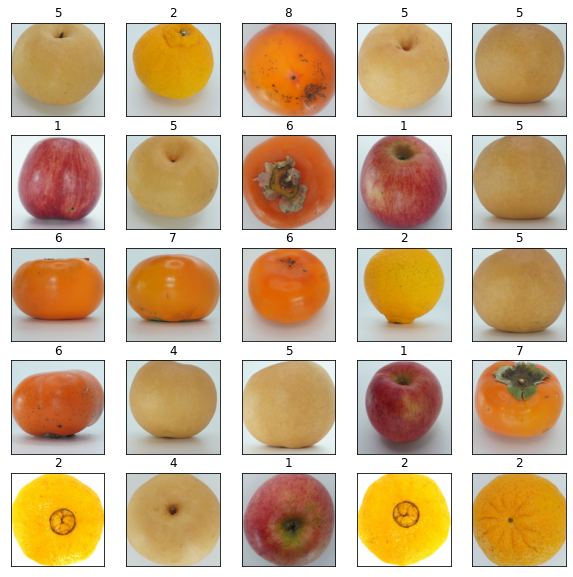

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.title(y_train[i])
plt.show()

## 데이터 표준화 하기

In [ ]:
X_train = X_train/255.
X_test = X_test/255.0

In [ ]:
type(X_train)
X_train[:1].view()

array([[[[0.81960784, 0.8745098 , 0.88627451],
         [0.81568627, 0.8745098 , 0.88627451],
         [0.81568627, 0.8745098 , 0.88627451],
         ...,
         [0.83921569, 0.89411765, 0.90588235],
         [0.84313725, 0.89411765, 0.90588235],
         [0.84313725, 0.89411765, 0.90588235]],

        [[0.81960784, 0.8745098 , 0.88627451],
         [0.81568627, 0.8745098 , 0.88627451],
         [0.81568627, 0.8745098 , 0.88627451],
         ...,
         [0.83921569, 0.89411765, 0.90588235],
         [0.83921569, 0.89411765, 0.90588235],
         [0.83921569, 0.89411765, 0.90196078]],

        [[0.81568627, 0.8745098 , 0.88627451],
         [0.81568627, 0.8745098 , 0.88627451],
         [0.81960784, 0.87843137, 0.89019608],
         ...,
         [0.83921569, 0.89411765, 0.90588235],
         [0.83921569, 0.89411765, 0.90196078],
         [0.83921569, 0.89411765, 0.90588235]],

        ...,

        [[0.7372549 , 0.76862745, 0.77254902],
         [0.73333333, 0.76470588, 0.76862745]

## 모델 정의

In [ ]:
print(len(index_dict))
num_classes = len(index_dict)

9


In [ ]:
model = Sequential([
                    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 128, 3)),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)        0         
g2D)                                                             
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)        0         
g2D)                                                             
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)       

In [ ]:
#체크포인트 콜백
##훈련하는 동안 가중치를 저장하기위해 사용한다.

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/csvdata/FruitClassify.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
epochs = 40
batch_size = 32

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs, batch_size=batch_size,
    callbacks=[cp_callback] #콜백을 훈련에 전달
)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4918: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


20/20 [==============================] - 12s 564ms/step - loss: 2.1694 - accuracy: 0.1955 - val_loss: 1.7334 - val_accuracy: 0.3974

Epoch 00001: saving model to /content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/csvdata/FruitClassify.ckpt
Epoch 2/40
20/20 [==============================] - 11s 566ms/step - loss: 1.1168 - accuracy: 0.5625 - val_loss: 0.6461 - val_accuracy: 0.7372

Epoch 00002: saving model to /content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/csvdata/FruitClassify.ckpt
Epoch 3/40
20/20 [==============================] - 11s 560ms/step - loss: 0.5096 - accuracy: 0.8109 - val_loss: 0.6342 - val_accuracy: 0.7308

Epoch 00003: saving model to /content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/csvdata/FruitClassify.ckpt
Epoch 4/40
20/20 [==============================] - 11s 558ms/step - loss: 0.5380 - accuracy: 0.7772 - val_loss: 0.7099 - val_accuracy: 0.7436

Epoch 00004: saving model to /content/drive/MyDrive/Colab Notebooks/파이널프로젝트

> best epoch : 29 loss : 0.03

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

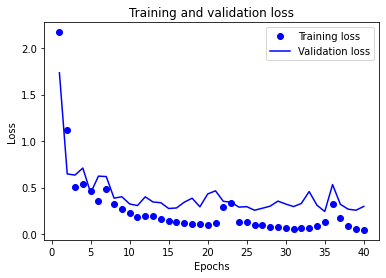

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

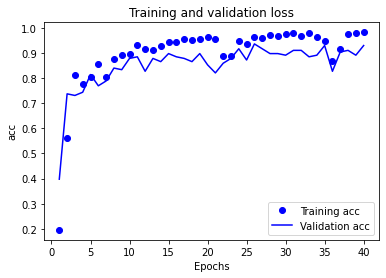

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

# 모델 저장

In [ ]:
import os 
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.7.0-dev20210816


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/saved_model/21_08_18_fruit_classification')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/saved_model/21_08_18_fruit_classification/assets


#모델 불러오기

In [134]:
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import zipfile
import os
from tensorflow import keras
from tensorflow.keras import preprocessing

new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/saved_model/21_08_18_fruit_classification')

#모델구조 확인
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)        0         
g2D)                                                             
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)        0         
g2D)                                                             
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)       

In [135]:
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)

print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))



/usr/local/lib/python3.7/dist-packages/keras/backend.py:4918: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


5/5 - 1s - loss: 0.2972 - accuracy: 0.9295 - 882ms/epoch - 176ms/step
복원된 모델의 정확도: 92.95%


#실제 이미지로 테스트해보자

In [142]:
print(os.getcwd())
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/Test_Image'))
image_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/Test_Image')
len(image_list)

/content
['mandarine_hallabong_L_18-10.png', 'persimmon_bansi_L_76-25_5DI90.png', 'persimmon_daebong_L_60-17_2FR45.png', 'apple_yanggwang_L_60-17_2FR45.png', 'apple_fuji_M_77-28_3FR90.png', 'apple_fuji_M_77-25_5DI90.png', 'apple_fuji_M_77-21_1TOP.png', 'persimmon_daebong_L_61-11_1TOP.png', 'persimmon_daebong_L_60-21_1TOP.png', 'persimmon_booyu_L_77-11_1TOP.png', 'mandarine_hallabong_L_18-109.png', 'persimmon_booyu_L_76-26_1TOP.png', 'persimmon_booyu_L_76-25_5DI90.png', 'persimmon_bansi_L_76-27_2FR45.png', 'persimmon_bansi_L_77-11_1TOP.png', 'persimmon_bansi_L_76-26_1TOP.png', 'persimmon_daebong_L_60-18_3FR90.png', 'mandarine_hallabong_L_19-108.png', 'mandarine_hallabong_L_18-25.png', 'pear_chuhwang_L_62-17_2FR45.png', 'mandarine_onjumilgam_L_61-12_2FR45.png', 'mandarine_onjumilgam_L_61-11_1TOP.png', 'mandarine_onjumilgam_L_60-25_5DI90.png', 'mandarine_onjumilgam_L_60-21_1TOP.png', 'apple_yanggwang_L_60-33_3FR90.png', 'apple_yanggwang_L_60-18_3FR90.png', 'pear_singo_L_60-21_1TOP.png', '

31

In [ ]:
def resizing_image(file_path, width, height):
  image = Image.open(file_path)
  resize_image = image.resize((width, height))
  imgarr = np.array(resize_image, dtype=np.int32)
  return imgarr

def getFruitName(file_name):
  split_str = file_name.split('_')
  return ('_').join(split_str[:2])

In [145]:
image_arr_list = []
Name_list = []
label_list = []
for file_name in image_list:
  image_arr_list.append(resizing_image('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/Test_Image/'+file_name, 128, 128))
  Name = getFruitName(file_name)
  label_list.append(index_dict[Name])

image_arr_list = np.array(image_arr_list, dtype=np.int32)
label_list = np.array(label_list, dtype=np.int32)

In [151]:
image_arr_list.shape

(31, 128, 128, 3)

In [ ]:
pred = new_model.predict(image_arr_list)

In [153]:
pred.shape

(31, 9)

In [ ]:
pred_list = []
for i in range(len(pred)):
  pred_list.append(pred[i].argmax())

pred_list

In [165]:
cnt = 0
for i in range(len(pred_list)):
  print('=============================================================')
  print('정답 :', label_list[i], '예측값 :', pred_list[i])
  print('정답 :', index_list[label_list[i]], '예측값 :', index_list[pred_list[i]])
  print('=============================================================')
  if (label_list[i] == pred_list[i]):
    cnt += 1


print(cnt, '/', len(pred_list))
print(round((cnt/len(pred_list))*100), '%')

정답 : 2 예측값 : 8
정답 : mandarine_hallabong 예측값 : persimmon_daebong
정답 : 6 예측값 : 6
정답 : persimmon_bansi 예측값 : persimmon_bansi
정답 : 8 예측값 : 8
정답 : persimmon_daebong 예측값 : persimmon_daebong
정답 : 1 예측값 : 1
정답 : apple_yanggwang 예측값 : apple_yanggwang
정답 : 0 예측값 : 0
정답 : apple_fuji 예측값 : apple_fuji
정답 : 0 예측값 : 0
정답 : apple_fuji 예측값 : apple_fuji
정답 : 0 예측값 : 0
정답 : apple_fuji 예측값 : apple_fuji
정답 : 8 예측값 : 8
정답 : persimmon_daebong 예측값 : persimmon_daebong
정답 : 8 예측값 : 8
정답 : persimmon_daebong 예측값 : persimmon_daebong
정답 : 7 예측값 : 7
정답 : persimmon_booyu 예측값 : persimmon_booyu
정답 : 2 예측값 : 2
정답 : mandarine_hallabong 예측값 : mandarine_hallabong
정답 : 7 예측값 : 7
정답 : persimmon_booyu 예측값 : persimmon_booyu
정답 : 7 예측값 : 7
정답 : persimmon_booyu 예측값 : persimmon_booyu
정답 : 6 예측값 : 7
정답 : persimmon_bansi 예측값 : persimmon_booyu
정답 : 6 예측값 : 7
정답 : persimmon_bansi 예측값 : persimmon_booyu
정답 : 6 예측값 : 7
정답 : persimmon_bansi 예측값 : persimmon_booyu
정답 : 8 예측값 : 8
정답 : persimmon_daebong 예측값 : persimmon_daebong
정답 : 2 예측값 : 7